<a href="https://colab.research.google.com/github/KoduriHarshitha/Skin-Cancer-Detection-/blob/main/SKIN_CANCER_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Skin Cancer Detection**

Introduction: Computer vision-based skin cancer detection has the potential to be very useful in the identification of skin cancer. Many lives can be saved if cancer is detected and treated early. To reliably classify skin lesions as skin cancer, it is critical to have efficient and improved image processing tools. Skin cancer is a condition caused by changes in the qualities of normal skin cells that cause them to become malignant, meaning that the cells continue to divide uncontrollably owing to DNA damage. Skin cancer has an uneven structure with cell differentiation at multiple levels of chromatin, nucleus, and cytoplasm, according to histopathology. Despite the fact that the incidence of Malignant Melanoma is lower than that of Basal Cell Carcinoma and Squamous Cell Carcinoma, the death rate is higher, accounting for 75 percent of all skin cancer deaths. Convolutional Neural Networks (CNN) are being used in the research to accurately categorise pigmented skin lesions in dermoscopic pictures in order to detect malignant skin lesions as early as feasible. Convolutional neural networks (CNNs) are a type of deep neural network that uses convolution instead of conventional matrix multiplication in at least one layer.They excel at assessing visual images because they are fully-connected (FC) feed-forward networks, which efficiently minimise the number of parameters without sacrificing model quality . The study looks at two convolutional neural networks with different architecture and/or depth, as well as data pre-processing methods, to evaluate how they effect skin lesion classification performance. The CNN architecture ResNet50 and ResNet152V2 models were employed.

ResNet50: ResNet-50 is a 50-layer deep convolutional neural network. You can import a pretrained version of the network from the ImageNet database, which has been trained on over a million photos. The network can classify photos into 1000 different object categories, including keyboards, mice, pencils, and a variety of animals. As a result, the network has learned a variety of rich feature representations for a variety of images. The network's picture input size is 224 × 224 pixels. The top-5 test accuracy is 92.7%

ResNet152V2: The ResNet152V2 model is followed by a reshape layer, a flatten layer, a dense layer with 128 neurons, a dropout layer, and finally a dense layer with Softmax activation function to categorise the picture into its appropriate class in the model architecture. The top-5 test accuracy is 94.3%.

Dataset: The goal of this project is to create the best accurate machine learning model for the HAM10000 dataset in order to categorise skin lesion categories in photographs ("Human Against Machine with 10000 training images"). This will assist clinicians in immediately identifying high-priority patients and expediting their workflow. The dataset consists of 10015 dermatoscopic images that were provided as a training set for academic machine learning and are freely accessible via the ISIC archive.(https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000).

There are seven attributes connected with each image and patient in the dataset:
1. lesion_id [lesion_id]
2. unique image_id [image_id]
3. diagnostic skin lesion category [dx] [To be predicted in our tests]
4. technical validation field type, which indicates how the skin lesion diagnosis was made [dx_type]
5. patient’s age [age]
6. patient’s sex [sex]
7. localization of the skin lesion [localization]

The following are the seven different diagnostic skin lesion classifications that must be predicted:
1. Melanocytic Nevi [nv] are benign melanocyte neoplasms that exist in a wide range of shapes and sizes. The variants may differ considerably from a dermatoscopic standpoint. [6705 images]
2. Melanoma [mel] is a cancerous tumour that develops from melanocytes and can take many different shapes. If detected early enough, it can be treated with a simple surgical excision. [1113 images]
3. Benign Keratosis-like Lesions [bkl]is a flat form of seborrheic keratosis and lichen-planus-like keratoses (LPLK), which is a seborrheic keratosis or solar lentigo with inflammation and regression. [1099 images]
4. Basal Cell Carcinoma [bcc] is an epithelial skin cancer that rarely spreads but can be fatal if left untreated. [514 photos]
5. Vascular lesions [vasc] range from cherry angiomas to angiokeratomas and pyogenic granulomas and can be benign or malignant.[142 photos]
6. Actinic Keratoses [akiec] are a non-invasive kind of squamous cell carcinoma that can be treated locally without surgery. [327 photos]
7. Vascular lesions [vasc] range from cherry angiomas to angiokeratomas and pyogenic granulomas and can be benign or malignant. [142 photos]



In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
# initiating gpu using tensorflow.
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import misc
from google.colab import files
import os
import zipfile

from PIL import Image as pil_image
from matplotlib.pyplot import imshow, imsave
from IPython.display import Image as Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

import keras
from keras import backend
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, Callback, CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception, ResNet50 ,ResNet152V2
from tensorflow.keras import models, layers
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#To see the value of multiple statements at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Use this to supress warnings from scipy in the meantime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshithakoduri","key":"920cc28f70745943c12440d72a63e8ed"}'}

In [ ]:
!mkdir ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import kaggle
print("Imported kaggle API successfully !")

Imported kaggle API successfully !


In [ ]:
print("Downloading dataset : ")
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
print("Downloaded Successfully!")

100% 5.20G/5.20G [04:05<00:00, 22.1MB/s]
100% 5.20G/5.20G [04:05<00:00, 22.7MB/s]
Downloaded Successfully!


In [ ]:
!unzip skin-cancer-mnist-ham10000.zip

In [ ]:
print('Extracting Images into single directory')
os.makedirs('images',exist_ok=True)
!cp -av 'HAM10000_images_part_1' 'images'
!cp -av 'HAM10000_images_part_2' 'images'n
print('Succesfully extracted Images into single directory')

**Exploratory Data Analysis (EDA):**


In [ ]:
df=pd.read_csv('HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
lesion_type_dict = {
    'bkl': 'Benign keratosis-like lesions ',
    'mel': 'Melanoma',
    'vasc': 'Vascular lesions',
    'bcc': 'Basal cell carcinoma',
    'nv': 'Melanocytic nevi',
    'akiec': 'Actinic keratoses',
    'df': 'Dermatofibroma'
}
lesion_classes_dict = {
    0:'bkl',
    1:'mel',
    2:'vasc',
    3:'bcc',
    4:'nv',
    5:'akiec',
    6:'df'
}

In [ ]:
df['celltype']=df['dx'].map(lesion_type_dict.get)
df['cell_type_idx']=pd.Categorical(df['celltype']).codes

In [ ]:
from glob import glob
image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('', '*', '*.jpg'))}

In [ ]:
df['path'] = df['image_id'].map(image_path.get)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,celltype,cell_type_idx,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,HAM10000_images_part_2/ISIC_0031633.jpg


**Numerical Analysis**

In [ ]:
print(df.shape)
print(df.info())

(10015, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      10015 non-null  object 
 1   image_id       10015 non-null  object 
 2   dx             10015 non-null  object 
 3   dx_type        10015 non-null  object 
 4   age            9958 non-null   float64
 5   sex            10015 non-null  object 
 6   localization   10015 non-null  object 
 7   celltype       10015 non-null  object 
 8   cell_type_idx  10015 non-null  int8   
 9   path           10015 non-null  object 
dtypes: float64(1), int8(1), object(8)
memory usage: 714.1+ KB
None


In [ ]:
df.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,celltype,path
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,7,10015
top,HAM_0003789,ISIC_0027419,nv,histo,male,back,Melanocytic nevi,HAM10000_images_part_1/ISIC_0027419.jpg
freq,6,1,6705,5340,5406,2192,6705,1


In [ ]:
df.describe()

,age,cell_type_idx
count,9958.000000,10015.000000
mean,51.863828,3.623964
std,16.968614,1.208859
min,0.000000,0.000000
25%,40.000000,4.000000
50%,50.000000,4.000000
75%,65.000000,4.000000
max,85.000000,6.000000


**Cleaning the dataset**

In [ ]:
df = df.drop_duplicates(subset='lesion_id')
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,celltype,cell_type_idx,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0027419.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0026769.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,HAM10000_images_part_2/ISIC_0031633.jpg
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0029176.jpg
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0025837.jpg


In [ ]:
df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              52
sex               0
localization      0
celltype          0
cell_type_idx     0
path              0
dtype: int64

In [ ]:
df['age'].fillna((df['age'].mean()), inplace=True)   #filling the null values with the mean of age
df.isnull().sum()  #reverfying if there are any values present or not

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
celltype         0
cell_type_idx    0
path             0
dtype: int64

In [ ]:
df.dtypes


lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
celltype          object
cell_type_idx       int8
path              object
dtype: object

**Graphical Analysis:**

**Checking the Skin Cancer by Class and Plotting a graph Class against Number of data poinrs**

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Skin Cancer by Class')

Text(0.5, 0, 'Skin Cancer Class')

Text(0, 0.5, 'Number of Data Points')

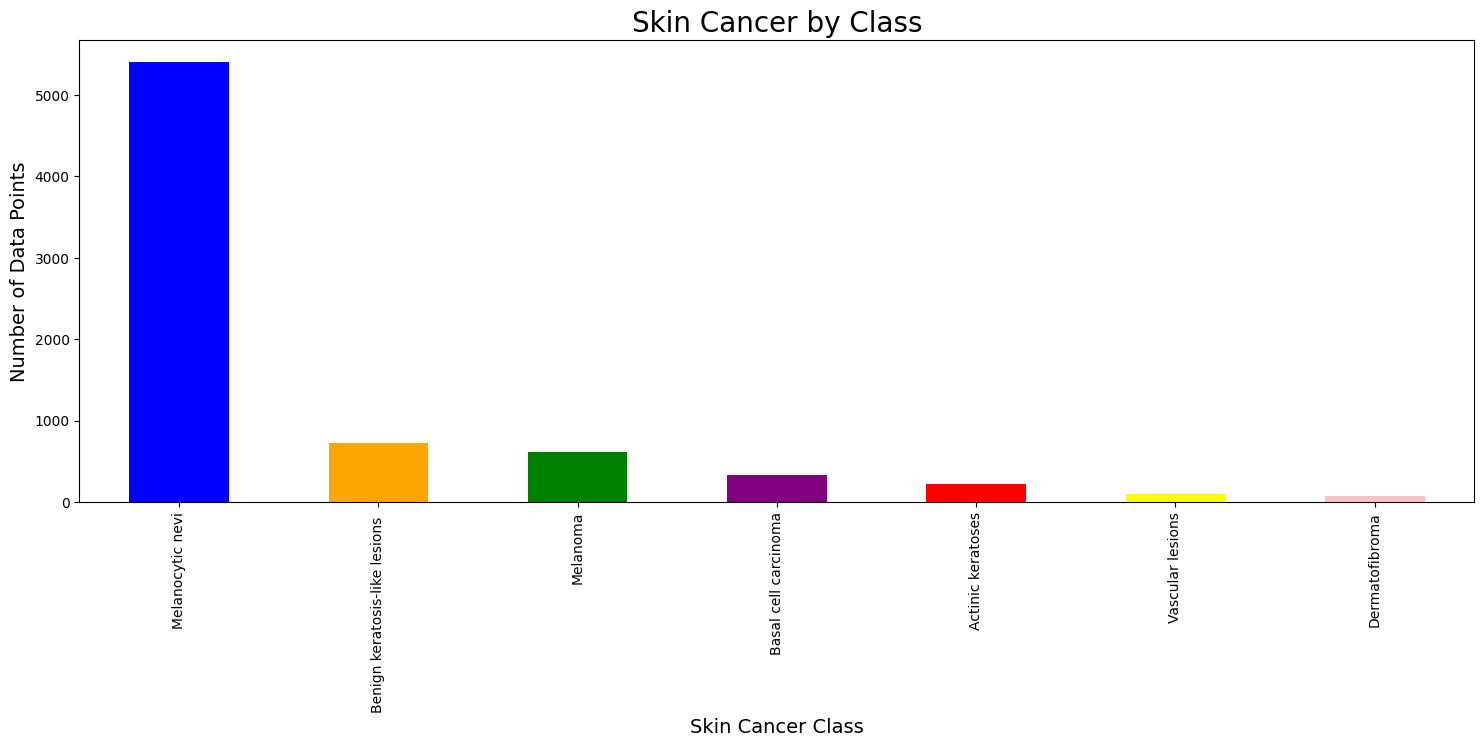

In [ ]:
plt.figure(figsize=(18, 6))
cancer_type=df['celltype'].value_counts().plot(kind='bar', color=["blue", "orange", "green", "purple", "red","yellow","pink"])
cancer_type.set_title('Skin Cancer by Class', fontsize=20)
cancer_type.set_xlabel('Skin Cancer Class', fontsize=14)
cancer_type.set_ylabel('Number of Data Points', fontsize=14)

In [ ]:
df['celltype'].value_counts()

Melanocytic nevi                  5403
Benign keratosis-like lesions      727
Melanoma                           614
Basal cell carcinoma               327
Actinic keratoses                  228
Vascular lesions                    98
Dermatofibroma                      73
Name: celltype, dtype: int64

**Plotting a graph for Localization of the Skin Cancer**

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Skin Cancer by Class')

Text(0.5, 0, 'Skin Cancer Class')

Text(0, 0.5, 'Number of Data Points')

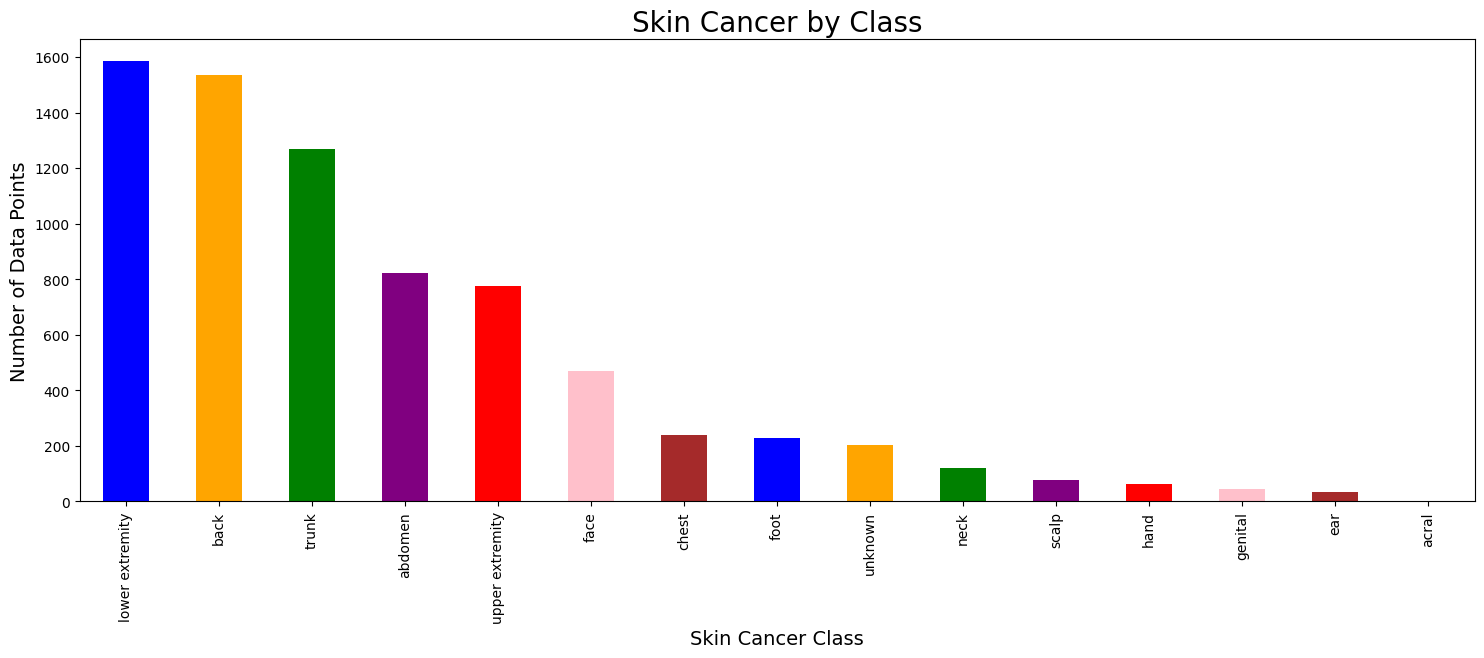

In [ ]:
plt.figure(figsize=(18, 6))
loc=df['localization'].value_counts().plot(kind='bar', color=["blue", "orange", "green", "purple", "red", "pink", "brown"])
loc.set_title('Skin Cancer by Class', fontsize=20)
loc.set_xlabel('Skin Cancer Class', fontsize=14)
loc.set_ylabel('Number of Data Points', fontsize=14)

**Plotting a graph by taking the attribute sex with the count**

Text(0.5, 1.0, 'Skin Cancer by Sex')

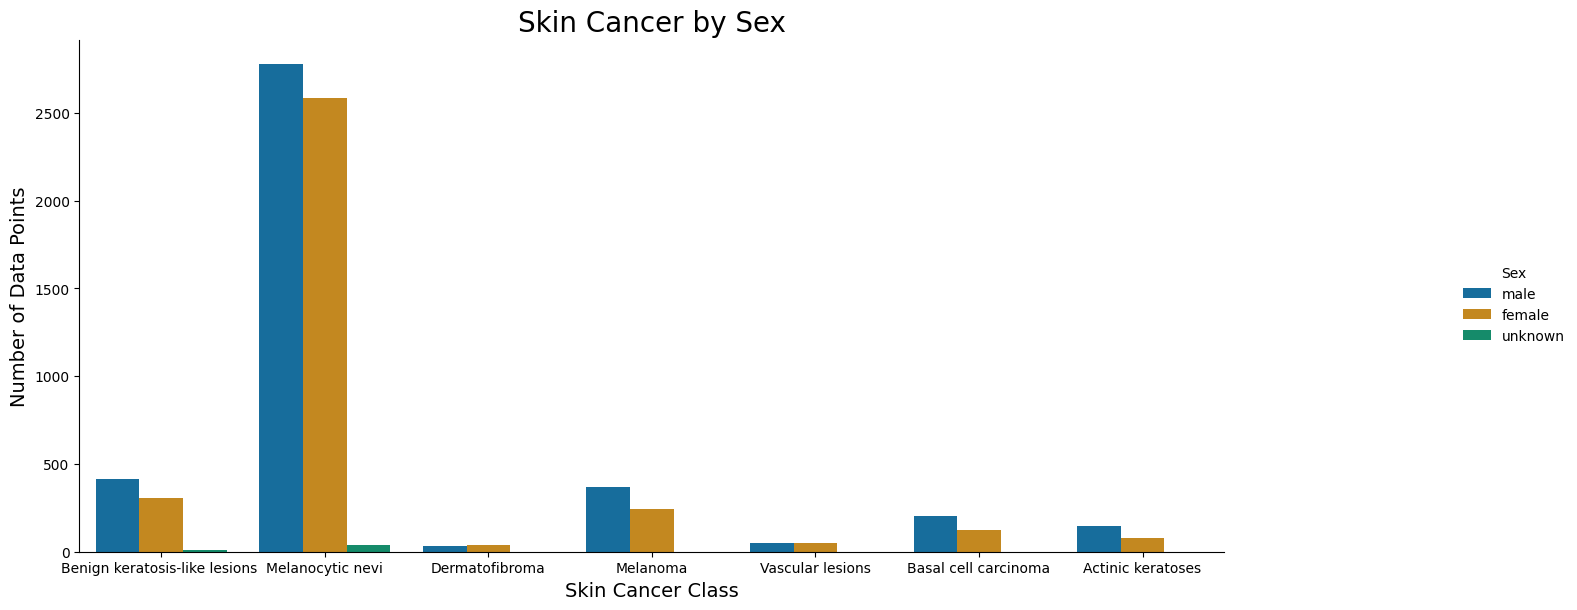

In [ ]:
gen= sns.catplot(x="celltype", kind="count", hue="sex", palette='colorblind', data=df)
gen.fig.set_size_inches(18, 6)
gen.ax.set_title('Skin Cancer by Sex', fontsize=20)
gen.set_xlabels('Skin Cancer Class', fontsize=14)
gen.set_ylabels('Number of Data Points', fontsize=14)
gen._legend.set_title('Sex')

**Plotting a graph by taking the attribute age with the count**

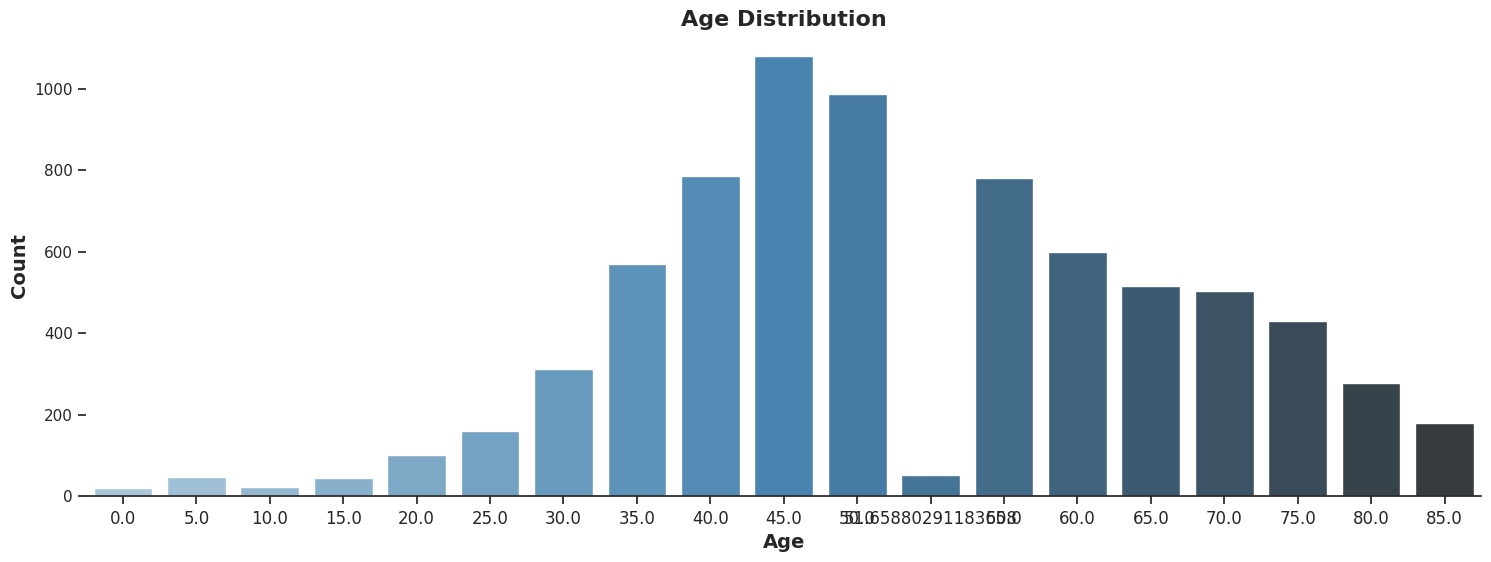

In [ ]:
plt.figure(figsize=(18,6))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data =df,x='age',palette="Blues_d")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Age',fontsize = 14,weight = 'bold')
ax.set_ylabel('Count',fontsize = 14,weight = 'bold')
plt.title('Age Distribution', fontsize = 16,weight = 'bold');

**To construct the model, the images must be processed and resized.**

**Let's calculate the image's width and height.**

In [ ]:
image=pil_image.open(df['path'][0])
width, height = image.size
print("Width: ", width)
print("Height:", height)

Width:  600
Height: 450


**To construct the model, the images must be processed and resized.**

**Let's calculate the image's width and height.**

**Resizing the images and adding the image pixels values to the df dataframe as a new column.**

In [ ]:
df['image']=df['path'].map(lambda x: np.asarray(pil_image.open(x).resize((150,120))))

In [ ]:
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,celltype,cell_type_idx,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0027419.jpg,"[[[188, 151, 193], [193, 156, 198], [192, 155,..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0026769.jpg,"[[[186, 126, 135], [189, 131, 142], [192, 137,..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,HAM10000_images_part_2/ISIC_0031633.jpg,"[[[128, 86, 109], [139, 94, 117], [148, 102, 1..."
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0029176.jpg,"[[[190, 143, 125], [191, 145, 129], [193, 146,..."
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,Benign keratosis-like lesions,2,HAM10000_images_part_1/ISIC_0025837.jpg,"[[[95, 61, 61], [104, 71, 71], [113, 77, 77], ..."


Text(0.5, 1.0, 'Benign keratosis-like lesions ')

(120, 150, 3)

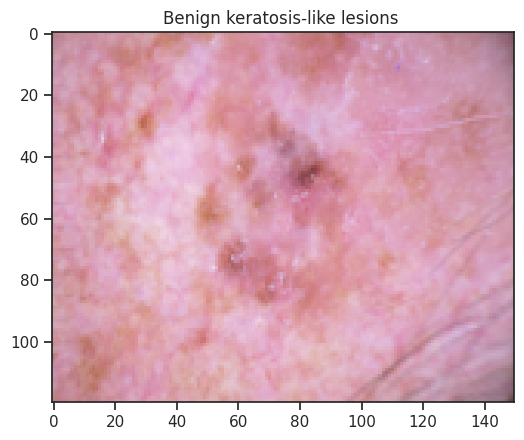

In [ ]:
plt.imshow(df['image'][2])
plt.title(df['celltype'][2])
df['image'][2].shape

Text(0.5, 1.0, 'Actinic keratoses')

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

Text(0.5, 1.0, 'Basal cell carcinoma')

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

Text(0.5, 1.0, 'Benign keratosis-like lesions ')

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

Text(0.5, 1.0, 'Dermatofibroma')

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

Text(0.5, 1.0, 'Melanocytic nevi')

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

Text(0.5, 1.0, 'Melanoma')

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

(-0.5, 149.5, 119.5, -0.5)

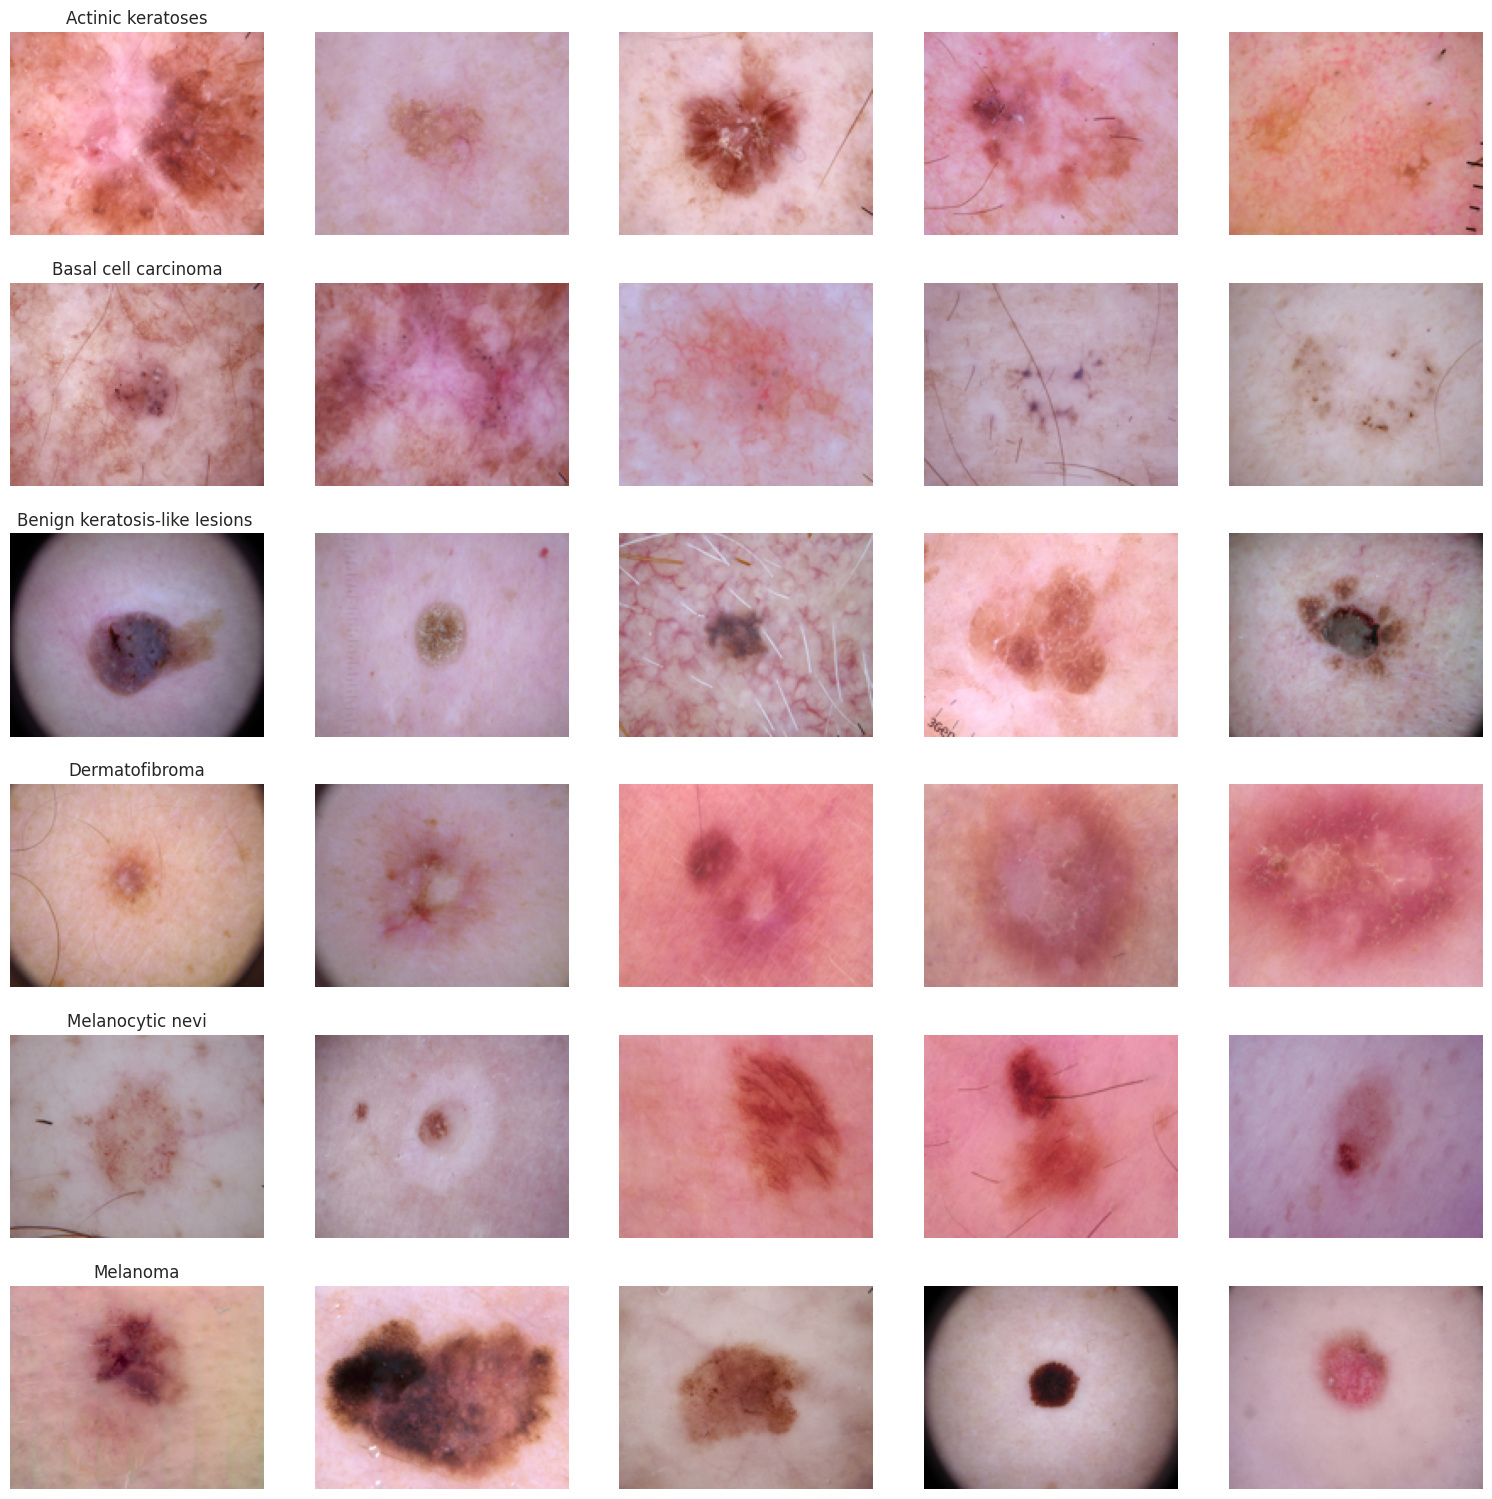

In [ ]:
fig,axes=plt.subplots(6,5,figsize=(19,19))
for nth_axis,(cell_type_name,cell_type_row) in zip(axes,df.sort_values(['celltype']).groupby('celltype')):
    nth_axis[0].set_title(cell_type_name)
    for column_axis,(_,column_row) in zip(nth_axis,cell_type_row.sample(5).iterrows()):
        column_axis.imshow(column_row['image'])
        column_axis.axis('off')

In [ ]:
fea=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

*Training, Validation and Test Split: * italicized text We began by dividing the dataset into two parts: training data and testing data. The 80 percent training data is then split into 88 percent training data and 12 percent validation data, resulting in our 70 percent training - 10% validation - 20% testing model. Note that the split will be applied to each class separately to guarantee that each split has enough samples from each class for appropriate modelling, therefore each class will be split 70:10:20. This is accomplished by setting our aim to'stratify' in the train test split function.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(fea,target,test_size=0.25,stratify=target)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [ ]:
X_train_nor = np.asarray(X_train['image'].tolist())
X_test_nor = np.asarray(X_test['image'].tolist())
X_val_nor=np.asarray(X_val['image'].tolist())

In [ ]:
#calculating the train mean and standard deviation
X_train_mean=np.mean(X_train_nor)
X_train_sd=np.std(X_train_nor)
#Normalizing the each image by substracting it's value with training mean value and then dividing by the training standard deviation
X_train_normal=(X_train_nor-X_train_mean)/X_train_sd
X_test_normal=(X_test_nor-X_train_mean)/X_train_sd
X_val_normal=(X_val_nor-X_train_mean)/X_train_sd

**Target One-Hot Encoding**

**Because we have 7 distinct label integer values, the integer encoded variable is removed and a new binary variable is inserted for each unique integer value, yielding the (1,7) row vector in our example. Because the integer values of the label have no ordinal relationship, this is required. It nullifies any natural integer ordering assumption reached by the ML method.**

In [ ]:
num_classes = 7
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)
y_val = to_categorical(y_val, num_classes = 7)

**Reducing the image shape**

In [ ]:
input_shape=(150,120,3)
X_train_normal=X_train_normal.reshape(X_train_normal.shape[0],*(input_shape))
X_test_normal=X_test_normal.reshape(X_test_normal.shape[0],*(input_shape))
X_val_normal=X_val_normal.reshape(X_val_normal.shape[0],*(input_shape))

In [ ]:
X_train_normal.shape

(4481, 150, 120, 3)

**Data Augmentation**
The image will be:
1. Randomly rotated by 20%
2. Randomly shifted horizontally by 20%
3. Randomly shifted vertically by 20%
4. Randomly sheared by 10%
5. Randomly zoomed by 10%
6. Randomly channel shifted by 10%

In [ ]:
aug_data = ImageDataGenerator(zca_epsilon=1e-06,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.1,
                                    zoom_range=0.1,
                                    channel_shift_range=0.1)

In [ ]:
aug_data.fit(X_train_normal)

**Bulding a ResNet50 model using Transfer Learning** :
ResNet-50 is a 50-layer deep convolutional neural network. You can import a pretrained version of the network from the ImageNet database, which has been trained on over a million photos.The network's picture input size is 224 × 224 pixels. The top-5 test accuracy is 92.7%

**Deafult ResNet50 model**

In [ ]:
resnet_model=ResNet50(weights='imagenet')
resnet_model.summary()

We need to modify the parameter image size in the first layer since the default ResNet50 model expects image size to be (224,244,3). However, our image sizes are different, hence we need to change the parameter image size in the first layer. The size of our group will be (150,120,3). We are omitting the top layer and altering it because our problem has seven classes.

**Customizing ResNet50 model**



In [ ]:
in_layer=layers.Input(shape=(150,120,3))
base_resnet_model = ResNet50(include_top=False, weights='imagenet', input_tensor=in_layer, pooling=None, classes=7)
base_resnet_model.summary()

We can see from the above customised ResNet50 model that the first layer has an image size of (150,120,3), and that two top(last layers) that were previously part of the ResNet50 model are now not part of our customised layer because we have set include. _top=False.

**Customizing the last(top layer)**

In [ ]:
print("Summary of Custom ResNet model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")
last_layer=base_resnet_model.output
flatten=layers.Flatten()(last_layer)
out_layer=layers.Dense(7,activation='softmax')(flatten)
Resnet_model=models.Model(inputs=in_layer,outputs=out_layer)
Resnet_model.summary()

**Compilation of the model**

In [ ]:
Resnet_model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
print("Model compilation completed.")

Model compilation completed.


**Setting a learning rate reduction callback (used across both the models)**

In [ ]:
callbacks = [EarlyStopping(monitor='accuracy',patience=5)]

**Hyperparameter values (used for both the models)**

In [ ]:
epoch = 25
batch_size = 10
step_per_epoch = len(X_train_normal) / 10

**Fitting the model**

In [ ]:
ResNet_results = Resnet_model.fit(aug_data.flow(X_train_normal,y_train,batch_size=batch_size),validation_data=(X_val_normal,y_val),
                           epochs= epoch, steps_per_epoch=step_per_epoch,verbose=1,callbacks=callbacks
                             )

Epoch 1/25
448/448 [==============================] - 97s 96ms/step - loss: 3.3303 - accuracy: 0.6918 - val_loss: 1.5216 - val_accuracy: 0.7190
Epoch 2/25
448/448 [==============================] - 40s 89ms/step - loss: 1.2837 - accuracy: 0.7157 - val_loss: 1.0439 - val_accuracy: 0.6994
Epoch 3/25
448/448 [==============================] - 38s 84ms/step - loss: 1.6893 - accuracy: 0.7114 - val_loss: 4.7145 - val_accuracy: 0.7217
Epoch 4/25
448/448 [==============================] - 37s 83ms/step - loss: 1.0238 - accuracy: 0.7184 - val_loss: 1.0389 - val_accuracy: 0.7306
Epoch 5/25
448/448 [==============================] - 37s 83ms/step - loss: 0.8638 - accuracy: 0.7181 - val_loss: 0.8440 - val_accuracy: 0.7190
Epoch 6/25
448/448 [==============================] - 38s 85ms/step - loss: 0.8297 - accuracy: 0.7219 - val_loss: 1.6105 - val_accuracy: 0.7261
Epoch 7/25
448/448 [==============================] - 39s 87ms/step - loss: 0.8277 - accuracy: 0.7264 - val_loss: 1.0323 - val_accuracy:

**Plotting the results for training, validation
,accuracy, and training, validation loss**

Text(0.5, 1.0, 'ResNet50_model Accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

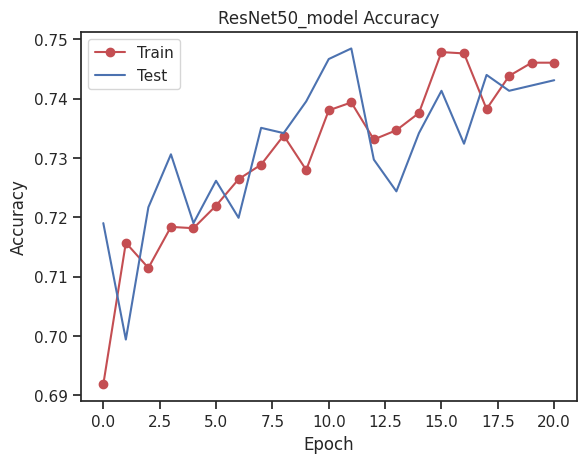

Text(0.5, 1.0, 'ResNet50_model Loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

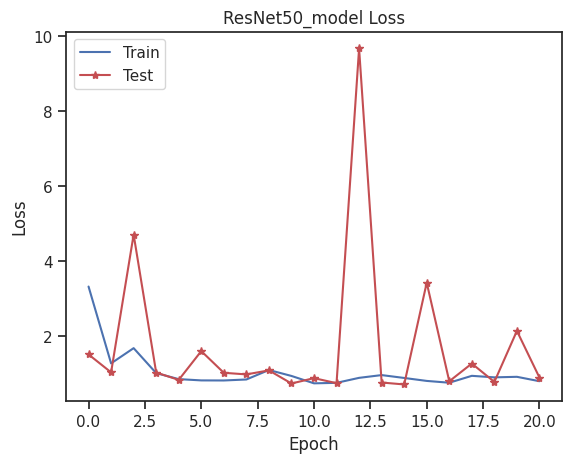

In [ ]:
# Plot training & validation accuracy values

plt.plot(ResNet_results.history['accuracy'], 'ro-', label='Training accuracy')
plt.plot(ResNet_results.history['val_accuracy'], 'b', label='Validation accuracy',)
plt.title('ResNet50_model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(ResNet_results.history['loss'], 'b', label='Training accuracy')
plt.plot(ResNet_results.history['val_loss'], 'r*-', label='Validation accuracy',)
plt.title('ResNet50_model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
yhat_prob=Resnet_model.predict(X_test_normal)
yhat_classes=np.argmax(yhat_prob,axis=1)
print(yhat_classes)
y_true_classes = np.argmax(y_test, axis = 1)
print(y_true_classes)

59/59 [==============================] - 4s 49ms/step
[4 4 4 ... 4 4 4]
[4 4 3 ... 4 4 4]


**Printing the Accuracy, Precision and Recall values**

In [ ]:
accuracy_Resnet=accuracy_score(y_true_classes,yhat_classes)
print("Accuracy: %f" % accuracy_Resnet)
precision_Resnet=precision_score(y_true_classes,yhat_classes,average='weighted')
print("Precision: %f" % precision_Resnet)
recall_Resnet=recall_score(y_true_classes,yhat_classes,average='weighted')
print("Recall: %f" % recall_Resnet)

Accuracy: 0.754283
Precision: 0.701193
Recall: 0.754283


Original Shape of image is :  (120, 150, 3)


Text(0.5, 1.0, 'Benign keratosis-like lesions ')

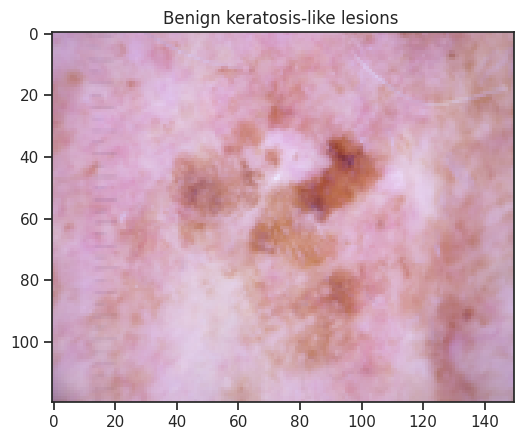

In [ ]:
test_image = df['image'][0]
print('Original Shape of image is : ',test_image.shape)
plt.imshow(test_image)
plt.title(df['celltype'][0])

**Bulding a ResNet152V2 model using Transfer Learning** :
The ResNet152V2 model is followed by a reshape layer, a flatten layer, a dense layer with 128 neurons, a dropout layer, and finally a dense layer with Softmax activation function to categorise the picture into its appropriate class in the model architecture. The top-5 test accuracy is 94.3%

**Deafult ResNet152V2 model**

In [ ]:
ResNet152V2_model=ResNet152V2(weights="imagenet")
ResNet152V2_model.summary()

We need to modify the parameter image size in the first layer since the default ResNet152V2 model expects image size to be (224,244,3). However, our image sizes are different, hence we need to change the parameter image size in the first layer. The size of our group will be (150,120,3). We are omitting the top layer and altering it because our problem has seven classes.

**Customizing the Resnet152V2 Model**

In [ ]:
input_layer=layers.Input(shape=(150,120,3))
base_res152v2_model = ResNet152V2(include_top=False, weights='imagenet', input_tensor=input_layer, input_shape=input_shape, pooling=None, classes=1000)
base_res152v2_model.summary()

We can see from the above customised ResNet152V2 model that the first layer has an image size of (150,120,3), and that two top(last layers) that were previously part of the ResNet152V2 model are now not part of our customised layer because we have set include. _top=False.

**Customizing the last(top layer)**

In [ ]:
print("Summary of Custom ResNet152V2 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")
last_layer=base_res152v2_model.output
flatten=layers.Flatten()(last_layer)
output_layer=layers.Dense(7,activation='softmax')(flatten)
res152v2_custom_model=models.Model(inputs=input_layer,outputs=output_layer)
res152v2_custom_model.summary()

**Compilation of ResNet152V2 Model**

In [ ]:
res152v2_custom_model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
print("Model compilation completed.")

Model compilation completed.


**Setting a learning rate reduction callback (used across both the models)**



In [ ]:
callbacks = [EarlyStopping(monitor='accuracy',patience=4)]

**Hyperparameters**

In [ ]:
epochs = 25
batch_size = 10
steps_per_epoch = len(X_train_normal) / 10

**Fitting the ResNet152V2**

In [ ]:
res152v2_results = res152v2_custom_model.fit(aug_data.flow(X_train_normal,y_train,batch_size=batch_size),
                                       epochs=epochs,verbose=1,
                                       validation_data=(X_val_normal,y_val),steps_per_epoch = steps_per_epoch,callbacks=callbacks)

Epoch 1/25
448/448 [==============================] - 186s 185ms/step - loss: 1.6501 - accuracy: 0.7072 - val_loss: 297.5447 - val_accuracy: 0.7235
Epoch 2/25
448/448 [==============================] - 79s 175ms/step - loss: 1.1842 - accuracy: 0.7195 - val_loss: 3.0617 - val_accuracy: 0.7226
Epoch 3/25
448/448 [==============================] - 79s 175ms/step - loss: 1.1563 - accuracy: 0.7206 - val_loss: 1.0368 - val_accuracy: 0.7235
Epoch 4/25
448/448 [==============================] - 79s 177ms/step - loss: 1.2052 - accuracy: 0.7168 - val_loss: 739.5377 - val_accuracy: 0.7163
Epoch 5/25
448/448 [==============================] - 78s 173ms/step - loss: 1.3398 - accuracy: 0.7202 - val_loss: 1.1243 - val_accuracy: 0.7235
Epoch 6/25
448/448 [==============================] - 79s 177ms/step - loss: 1.4509 - accuracy: 0.7168 - val_loss: 1.1575 - val_accuracy: 0.7235
Epoch 7/25
448/448 [==============================] - 79s 177ms/step - loss: 1.0081 - accuracy: 0.7206 - val_loss: 648.9227 -

**Plotting the results for training, validation accuracy, and training, validation loss**

Text(0.5, 1.0, 'ResNet152V2_model Accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

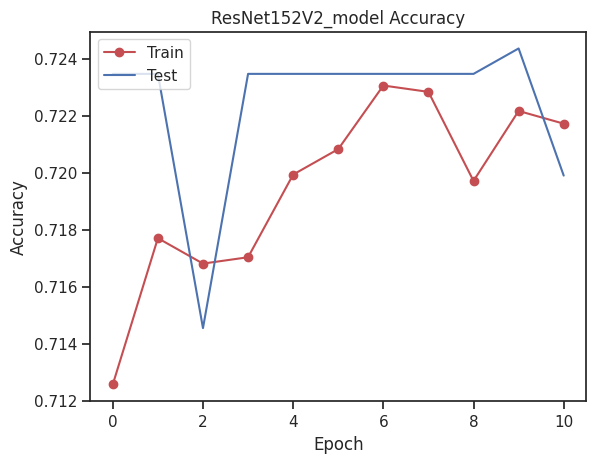

Text(0.5, 1.0, 'ResNet152V2_model Loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

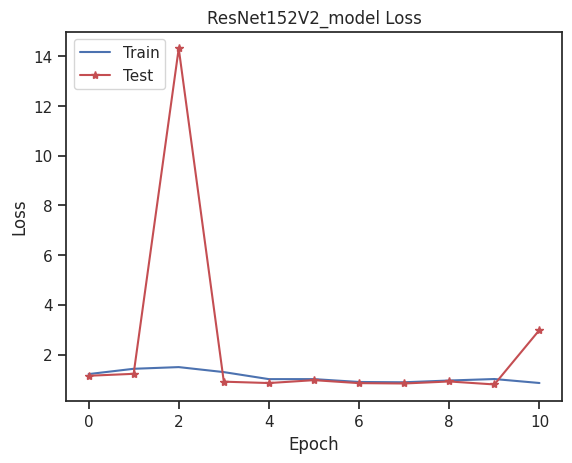

In [ ]:
# Plot training & validation accuracy values

plt.plot(res152v2_results.history['accuracy'], 'ro-', label='Training accuracy')
plt.plot(res152v2_results.history['val_accuracy'], 'b', label='Validation accuracy',)
plt.title('ResNet152V2_model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(res152v2_results.history['loss'], 'b', label='Training accuracy')
plt.plot(res152v2_results.history['val_loss'], 'r*-', label='Validation accuracy',)
plt.title('ResNet152V2_model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()